Saving Dataset .csv to Dataset  (1).csv
Top 10 Restaurant Chains:
    Restaurant Name  Number of Locations  Average Rating  Average Votes
0   Cafe Coffee Day                   83        2.419277      29.253012
1    Domino's Pizza                   79        2.740506      84.088608
2            Subway                   63        2.907937      97.206349
3  Green Chick Chop                   51        2.672549      18.901961
4        McDonald's                   48        3.339583     110.229167
5         Keventers                   34        2.870588      37.147059
6         Pizza Hut                   30        3.320000     165.366667
7             Giani                   29        2.689655      29.448276
8    Baskin Robbins                   28        1.860714      15.285714
9   Barbeque Nation                   26        4.353846    1082.384615


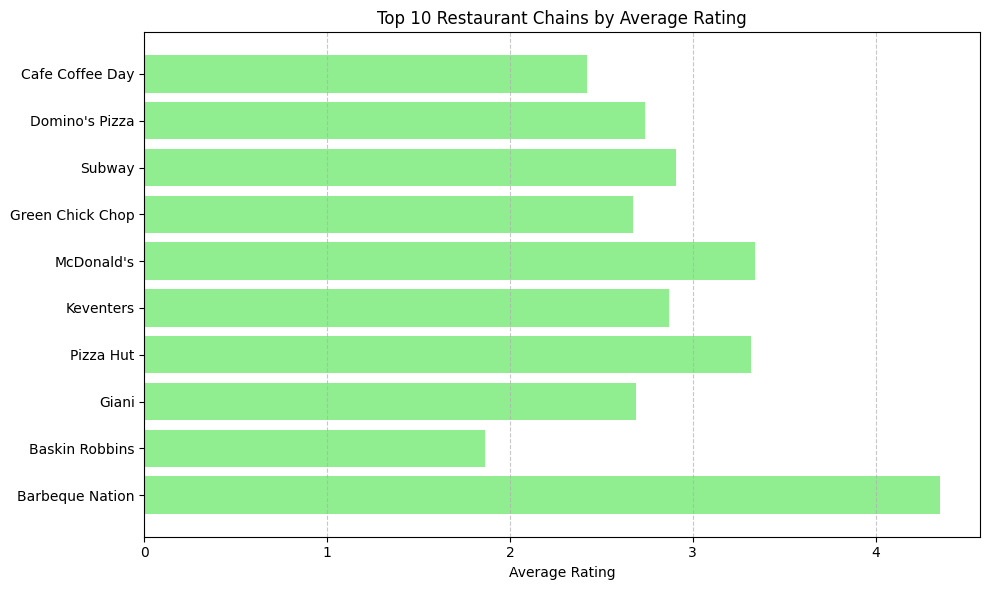

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Upload dataset
from google.colab import files
uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv("Dataset .csv")

# Step 4: Identify chains – restaurants that appear more than once
restaurant_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]
df_chains = df[df['Restaurant Name'].isin(restaurant_chains.index)]

# Step 5: Group by restaurant name
chain_analysis = df_chains.groupby('Restaurant Name').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Votes': 'mean'
}).rename(columns={
    'Restaurant ID': 'Number of Locations',
    'Aggregate rating': 'Average Rating',
    'Votes': 'Average Votes'
}).sort_values(by='Number of Locations', ascending=False).head(10)

# Step 6: Reset index to make it pretty
chain_analysis.reset_index(inplace=True)

# Step 7: Display result
print("Top 10 Restaurant Chains:")
print(chain_analysis)

# Step 8: Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(chain_analysis['Restaurant Name'][::-1], chain_analysis['Average Rating'][::-1], color='lightgreen')
plt.xlabel('Average Rating')
plt.title('Top 10 Restaurant Chains by Average Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
